In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-localapprox-interpolation)=
# The interpolation problem

```{index} ! interpolation
```

:::{proof:definition} Interpolation problem
Given $n+1$ distinct points $(t_0,y_0)$, $(t_1,y_1),\ldots,(t_n,y_n)$, with $t_0<t_1<\ldots <t_n$ called **nodes**, the **interpolation problem** is to find a function $p(x)$, called the **interpolant**, such that $p(t_k)=y_k$ for $k=0,\dots,n$.
:::

In this chapter, we use $t_k$ for the nodes and $x$ to denote the continuous independent variable. 


```{index} Julia; indexing arrays
```

:::{attention}
The interpolation nodes are numbered from 0 to $n$. This is convenient for our mathematical statements, but less so in a language such as Julia in which vector indices start with 1. Our approach is that *indices in a computer code have the same meaning as those identically named in the mathematical formulas*, and therefore must be incremented by one whenever used in an indexing context.
:::

## Polynomials

```{index} interpolation; by polynomials
```
Polynomials are the obvious first candidate to serve as interpolating functions. They are easy to work with, and in {numref}`section-linsys-polyinterp` we saw that a linear system of equations can be used to determine the coefficients of a polynomial that passes through every member of a set of given points in the plane. However, it's not hard to find examples for which polynomial interpolation leads to unusable results.

(demo-interpolation-global)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Here are some points that we could consider to be observations of an unknown function on $[-1,1]$.

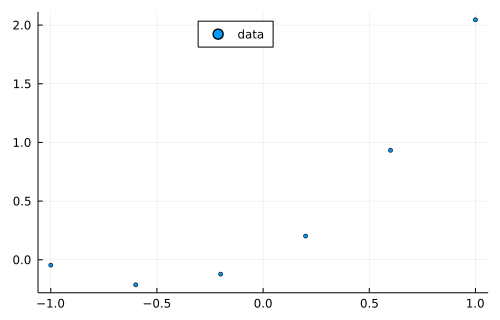

In [2]:
n = 5
t = range(-1,1,length=n+1)
y = @. t^2 + t + 0.05*sin(20*t)

scatter(t,y,label="data",leg=:top)

```{index} ! Julia; fit
```

The polynomial interpolant, as computed using `fit`, looks very sensible. It's the kind of function you'd take home to meet your parents.

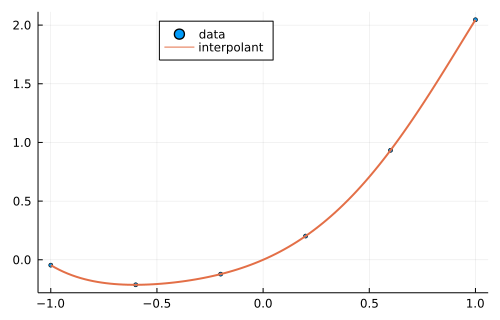

In [3]:
p = Polynomials.fit(t,y,n)     # interpolating polynomial
plot!(p,-1,1,label="interpolant")

But now consider a different set of points generated in almost exactly the same way.

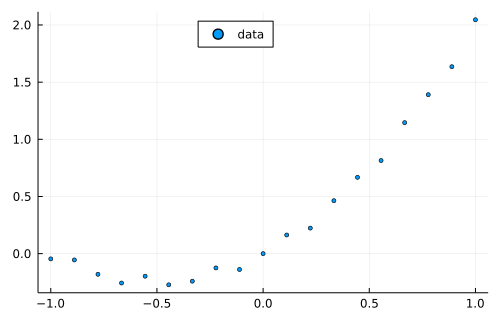

In [4]:
n = 18
t = range(-1,1,length=n+1)
y = @. t^2 + t + 0.05*sin(20*t)

scatter(t,y,label="data",leg=:top)

The points themselves are unremarkable. But take a look at what happens to the polynomial interpolant.

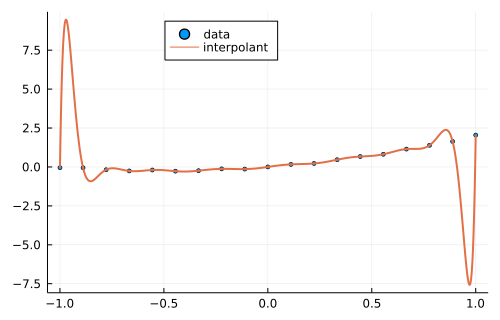

In [5]:
p = Polynomials.fit(t,y,n)
x = range(-1,1,length=1000)    # use a lot of points
plot!(x,p.(x),label="interpolant")

Surely there must be functions that are more intuitively representative of those points!
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


```{proof:observation}
Interpolation by a polynomial at equally spaced nodes is ill-conditioned as the degree of the polynomial grows.
```

In Chapter 9 we explore the large oscillations in the last figure of {numref}`Demo %s <demo-interpolation-global>`; it turns out that one must abandon either equally spaced nodes or $n\to\infty$ for polynomials. In the rest of this chapter we will keep $n$ fairly small and let the nodes be unrestricted.

## Piecewise polynomials

```{index} interpolation; by piecewise polynomials
```

In order to keep polynomial degrees small while interpolating large data sets, we will choose interpolants from the **piecewise polynomials**. Specifically, the interpolant $p$ must be a polynomial on each subinterval $[t_{k-1},t_k]$ for $k=1,\ldots,n$.

````{proof:example}
Some examples of piecewise polynomials for the nodes  $t_0=-2$, $t_1=0$, $t_2=1$, and $t_3=4$ are $p_1(x)=x+1$, $p_2(x)=\operatorname{sign}(x)$, $p_3(x)=|x-1|^{3}$, and $p_4(x)=(\max\{0,x\})^{4}$. Note that $p_{1}$, $p_{2}$, and $p_4$ would also be piecewise polynomial on the node set $\{t_0,t_1,t_3\}$, but $p_3$ would not.
````

Usually we designate in advance a maximum degree $d$ for each polynomial piece of $p(x)$. An important property of the piecewise polynomials of degree $d$ is that they form a vector space: that is, any linear combination of piecewise polynomials of degree $d$ is another piecewise polynomial of degree $d$. If $p$ and $q$ share the same node set, then the combination is piecewise polynomial on that node set.

(demo-interpolation-pwise)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Let us recall the data from {numref}`Demo %s <demo-interpolation-global>`.

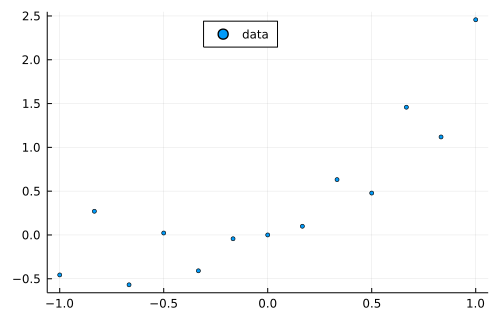

In [6]:
n = 12
t = range(-1,1,length=n+1)
y = @. t^2 + t + 0.5*sin(20*t)

scatter(t,y,label="data",leg=:top)

Here is an interpolant that is linear between each consecutive pair of nodes, using `plinterp` from {numref}`section-localapprox-pwlin`.

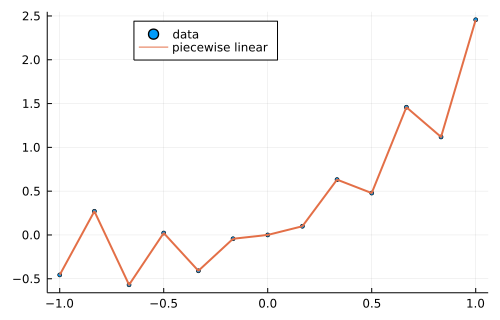

In [7]:
p = FNC.plinterp(t,y)
plot!(p,-1,1,label="piecewise linear")

```{index} ! Julia; Spline1D
```

We may prefer a smoother interpolant that is piecewise cubic, generated using `Spline1D` from the `Dierckx` package.

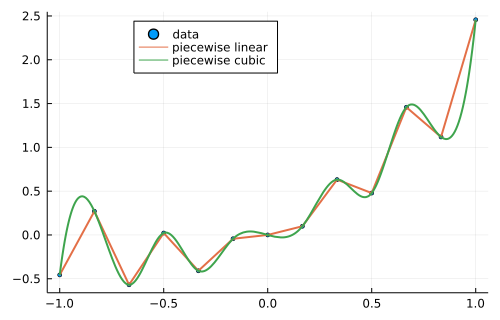

In [8]:
p = Spline1D(t,y)
plot!(x->p(x),-1,1,label="piecewise cubic")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

We will consider piecewise linear interpolation in more detail in {numref}`section-localapprox-pwlin`, and we look at piecewise cubic interpolation in {numref}`section-localapprox-splines`.

## Conditioning of interpolation

In the interpolation problem we are given the values $(t_k,y_k)$ for $k=0,\ldots,n$. Let us consider the nodes $t_k$ of the problem to be fixed, and let $a=t_0$, $b=t_n$. Then the data for the interpolation problem consists of a vector $\mathbf{y}$, and the result of the problem is a function on $[a,b]$.

Let $\mathcal{I}$ be a prescription for producing the interpolant from a data vector.  That is, $\mathcal{I}(\mathbf{y})=p$, where $p(t_k)=y_k$ for all $k$. The interpolation methods we will consider are all *linear*, in the sense that

```{math}
:label: interp-linearity
\cI(\alpha\mathbf{y} + \beta\mathbf{z}) = \alpha \cI(\mathbf{y}) + \beta \cI(\mathbf{z})
```

for all vectors $\mathbf{y},\mathbf{z}$ and scalars $\alpha,\beta$.

Linearity greatly simplifies the analysis of interpolation. To begin with, for any data vector $\mathbf{y}$ we have the standard expression $\mathbf{y}=\sum y_k \mathbf{e}_k$, where as always $\mathbf{e}_k$ is a column of an identity matrix.[^startzero] Hence by linearity,

[^startzero]: To be precise, we are using $\mathbf{e}_k$ to mean column number $k+1$ from an $(n+1)\times (n+1)$ identity matrix, since in linear algebra we start indexing at 1.

:::{math}
:label: interp-cardinal1
\cI( \mathbf{y} ) = \cI \left( \sum_{k=0}^n y_k \mathbf{e}_k  \right) = \sum_{k=0}^n y_k \cI( \mathbf{e}_k ).
:::

The functions appearing within the sum above have particular significance. 

```{index} ! cardinal function
```

::::{proof:definition} Cardinal function
A **cardinal function** $\phi_k$ for a node set $t_0,\ldots,t_n$ is the function that interpolates the value $(t_k,1)$ and $(t_j,0)$ for all $j\neq k$. 
::::

For any set of $n+1$ nodes, there are $n+1$ cardinal functions $\phi_0,\ldots,\phi_n$, each singling out a different interpolation node in the set. We finish {eq}`interp-cardinal1` by writing

:::{math}
:label: interp-cardinal2
\cI( \mathbf{y} ) = \sum_{k=0}^n y_k \phi_k.
:::

In the following result we use the function infinity-norm or max-norm defined by

```{math}
:label: norm-function-inf
\| f\|_{\infty} = \max_{x \in [a,b]} |f(x)|.
```

```{index} condition number; of interpolation
```

(theorem-interp-conditioning)=
````{proof:theorem} Conditioning of interpolation 
Suppose that $\cI$ is a linear interpolation method on nodes $t_0,\ldots,t_n$. Then with respect to the infinity norm, the absolute condition number of $\cI$ satisfies
  
```{math}
:label: interp-conditioning
\max_{0\le k \le n}\, \bigl\| \phi_k \bigr\|_\infty \le \kappa(\mathbf{y}) \le  \sum_{k=0}^n  \, \bigl\| \phi_k \bigr\|_\infty,
```

where the $\phi_k$ are cardinal interpolating functions.
````

::::{proof:proof}
Suppose the data vector is perturbed from $\mathbf{y}$ to $\mathbf{y}+ \mathbf{d}$. Then

```{math}
  :label: lininterp-perturb
  \cI(\mathbf{y} + \mathbf{d}) - \cI(\mathbf{y}) = \cI(\mathbf{d}) = \sum_{k=0}^n d_k \phi_k.
```

Hence

```{math}
\frac{\bigl\|\cI(\mathbf{y} + \mathbf{d}) - \cI(\mathbf{y}) \bigr\|_{\infty}}{\| \mathbf{d} \|_{\infty}} =
\left\|\, \sum_{k=0}^{n} \frac{d_k}{\|\mathbf{d} \|_{\infty}} \phi_k \,  \right\|_{\infty}.
```

The absolute condition number maximizes this quantity over all $\mathbf{d}$. Suppose $j$ is such that $\|\phi_j\|_\infty$ is maximal. Then let $\mathbf{d}=\mathbf{e}_j$ and the first inequality in {eq}`interp-conditioning` follows. The other inequality follows from the triangle inequality:

$$
\left\| \, \sum_{k=0}^{n} \frac{d_k}{\|\mathbf{d} \|_{\infty}} \phi_k \,  \right\|_{\infty} \le \sum_{k=0}^{n} \frac{|d_k|}{\|\mathbf{d} \|_{\infty}} \| \phi_k \|_\infty.
$$

Since $|d_k|\le \|\mathbf{d}\|_\infty$ for all $k$, this finishes {eq}`interp-conditioning`.
::::

(demo-interp-cond)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

In {numref}`Demo %s <demo-interpolation-global>` and {numref}`Demo %s <demo-interpolation-pwise>` we saw a big difference between polynomial interpolation and piecewise polynomial interpolation of some arbitrarily chosen data. The same effects can be seen clearly in the cardinal functions, which are closely tied to the condition numbers.

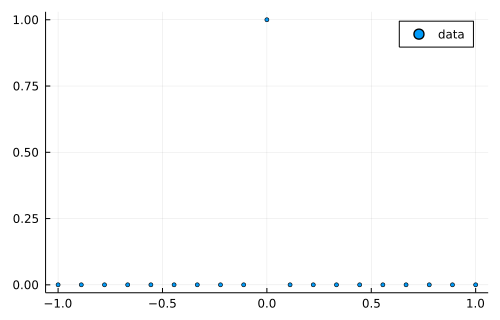

In [9]:
n = 18
t = range(-1,stop=1,length=n+1)
y = [zeros(9);1;zeros(n-9)];  # data for 10th cardinal function

scatter(t,y,label="data")

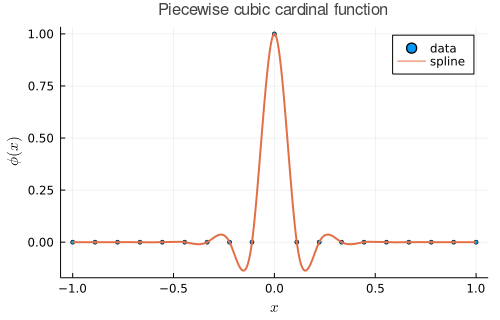

In [10]:
ϕ = Spline1D(t,y)
plot!(x->ϕ(x),-1,1,label="spline",
    xlabel=L"x",ylabel=L"\phi(x)",
    title="Piecewise cubic cardinal function")

The piecewise cubic cardinal function is nowhere greater than one in absolute value. This happens to be true for all the cardinal functions, ensuring a good condition number for any interpolation with these functions. But the story for global polynomials is very different.

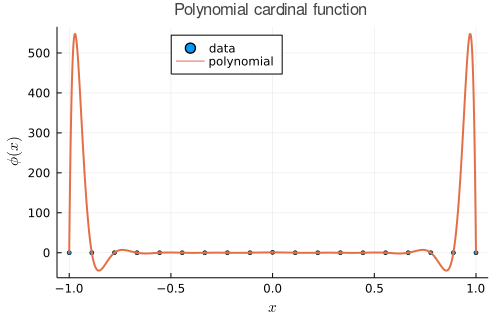

In [11]:
scatter(t,y,label="data")

ϕ = Polynomials.fit(t,y,n)
plot!(x->ϕ(x),-1,1,label="polynomial",
    xlabel=L"x",ylabel=L"\phi(x)",legend=:top,
    title="Polynomial cardinal function")

From the figure we can see that the condition number for polynomial interpolation on these nodes is at least 500.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

1. ⌨ Create data by entering

    ``` julia
    t = -2:4;  y = tanh.(t);
    ```

    **(a)** Use `fit` to construct and plot the polynomial interpolant of the data, superimposed on a scatter plot of the data.

    **(b)** Use `Spline1D` to construct and plot a piecewise cubic interpolant of the data, superimposed on a scatter plot of the data.

2. ⌨ The following table gives the life expectancy in the U.S. by year of birth.

      | 1980 | 1985 | 1990 | 1995 | 2000 | 2005 | 2010 |
      |:---:|:----:|:-----:|:----:|:----:|:----:|:----:|
      | 73.7 | 74.7 | 75.4 | 75.8 | 77.0 | 77.8 | 78.7 |

    **(a)** Defining "year since 1980" as the independent variable, use `fit` to construct and plot the polynomial interpolant of the data.

    **(b)** Use `Spline1D` to construct and plot a piecewise cubic interpolant of the data.

    **(c)** Use both methods to estimate the life expectancy for a person born in 2007. Which value is more believable?
  
3. ⌨ The following two vectors define a flying saucer shape.

    ``` julia
    x = [ 0,0.51,0.96,1.06,1.29,1.55,1.73,2.13,2.61,
          2.19,1.76,1.56,1.25,1.04,0.58,0 ]
    y = [ 0,0.16,0.16,0.43,0.62,0.48,0.19,0.18,0,
          -0.12,-0.12,-0.29,-0.30,-0.15,-0.16,0 ]
    ```
    We can regard both $x$ and $y$ as functions of a parameter $s$, with the points being values given at $s=0,1,\ldots,15$. 
    
    **(a)** Use `Spline1D` once on each coordinate as functions of $s$, and make a picture of the flying saucer. 

    **(b)** One drawback of the result in part (a) is the noticeable corner at the left side, which corresponds to $s=0$ from above and $s=15$ from below. There is a periodic variation on cubic spline interpolation that you can invoke by adding the keyword `periodic=true` to the `Spline1D` call. Use this to re-plot the flying saucer.

    (problem-quadratic-interpolant)=
4. ✍ Define

    ```{math}
    q(s) = a\frac{s(s-1)}{2} - b (s-1)(s+1) + c \frac{s(s+1)}{2}.
    ```

    **(a)** Show that $q$ is a polynomial interpolant of the points $(-1,a)$, $(0,b)$, $(1,c)$.

    **(b)** Find a change of variable $s=Ax+B$ so that the values $s=-1,0,1$ correspond to $x=x_0-h,x_0,x_0+h$. 

    **(c)** Find a quadratic polynomial interpolant $\tilde{q}(x)$ for the points $(x_0-h,a)$, $(x_0,b)$, $(x_0+h,c)$.

5. ✍ (continuation) Use the result of the previous exercise and {numref}`Theorem %s <theorem-interp-conditioning>` to derive bounds on the condition number of quadratic polynomial interpolation at the nodes $x_0-h$, $x_0$, $x_0+h$.